#HW8 Eligibility and Traces


##environment
The grid world size is 10*5 like following, red color and edge represent walls, every transition get reward = -1, if agent step into the swamps, get -100 reward.

parameters:

discounted rate = 1.0

learning rate = 0.1

lambda = 0.9

epsilon = 0.1

total_episode = 100


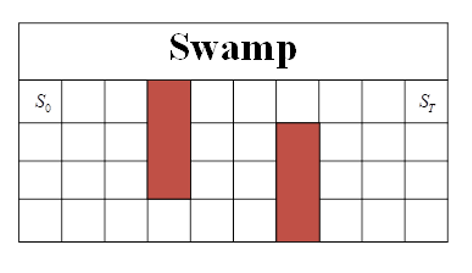

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd
from collections import defaultdict

In [30]:
# left, up, right, down
ACTIONS = [np.array([-1, 0]), np.array([0, 1]), np.array([1, 0]), np.array([0, -1])] #x, y

In [31]:
# Environment
def step(state, action):
  SWAMP = [[0,i] for i in range(10)]
  WALL = [[1,3],[2,3],[3,3],[2,6],[3,6],[4,6]]
  state_n = list(np.array(state) + np.array(action))
  state_n = [np.clip(state_n[0],0,4),np.clip(state_n[1],0,9)]
  state_n = state if state_n in WALL else state_n
  reward = -1
  if state_n in SWAMP:
     reward = -10
  return [state_n, reward]

In [32]:
def chooseAction(state, qtable, epsilon):
  if rd.rand()>=epsilon:
    return np.argmax(qtable[state[0],state[1]])
  else:
    return rd.randint(4)

In [33]:
def sarsa():
  qtable = rd.rand(5,10,4)
  qtable[1,9,:]=0
  returns = []
  for episode in range(100):
   ######code######
    epsilon = 0.1
    alpha = 0.1
    gamma = 1
    rewards = 0
    state = [1, 0]
    action = chooseAction(state, qtable, epsilon)
    while state != [1, 9]:
      new_state, reward = step(state, ACTIONS[action])
      new_action = chooseAction(new_state, qtable, epsilon)
      qtable[state[0], state[1], action] = qtable[state[0], state[1], action] + alpha * (reward + gamma * qtable[new_state[0], new_state[1], new_action] - qtable[state[0], state[1], action])
      rewards += reward
      action = new_action
      state = new_state

    returns.append(rewards)
  ################## 
    
  return returns

In [34]:
def sarsa_L(lambda_):
  lambda_ = lambda_
  qtable = rd.rand(5,10,4)
  qtable[1,9,:]=0
  returns = []
  for episode in range(100):
   ######code######
    epsilon = 0.1
    alpha = 0.1
    gamma = 1
    rewards = 0
    ztable = rd.rand(5,10,4)
    state = [1, 0]
    action = chooseAction(state, qtable, epsilon)
    while state != [1, 9]:
      new_state, reward = step(state, ACTIONS[action])
      new_action = chooseAction(new_state, qtable, epsilon)
      delta = reward + gamma * qtable[new_state[0], new_state[1], new_action] - qtable[state[0], state[1], action]
      ztable[state[0], state[1], action] = ztable[state[0], state[1], action] + 1
      for i in range(0, qtable.shape[0]):
        for j in range(0, qtable.shape[1]):
          for k in range(0, 4):
            qtable[i, j, k] = qtable[i, j, k] + alpha * delta * ztable[i, j, k]
            ztable[i, j, k] = gamma * lambda_ * ztable[i, j, k]

      rewards += reward
      action = new_action
      state = new_state

    returns.append(rewards)
  ################## 
    
  return returns

(-1000.0, 0.0)

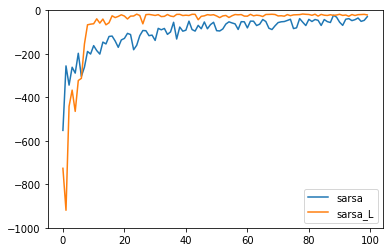

In [35]:
plt.plot(np.average([sarsa() for i in range(5 )],axis=0),label='sarsa')
plt.plot(np.average([sarsa_L(0.9) for i in range(5 )],axis=0),label='sarsa_L')
plt.legend()
plt.ylim(-1000,0)

## Result(60%)
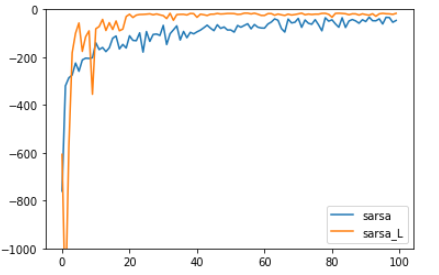

# Experiment1 (20%)

Compare the result of $sarsa(0.0)$,$sarsa(0.5)$,$sarsa(0.9)$,$sarsa$,in one graph.

A：λ越小，越像普通的Sarsa，當λ=0時，Sarsa(0)即是Sarsa。

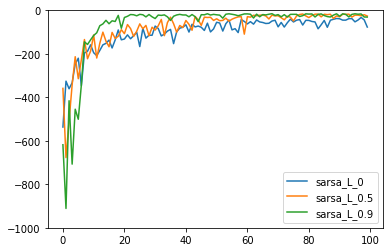

(-1000.0, 0.0)

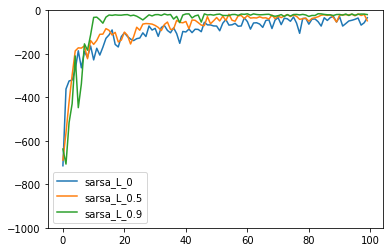

In [36]:
plt.plot(np.average([sarsa_L(0.0) for i in range(5 )],axis=0),label='sarsa_L_0')
plt.plot(np.average([sarsa_L(0.5) for i in range(5 )],axis=0),label='sarsa_L_0.5')
plt.plot(np.average([sarsa_L(0.9) for i in range(5 )],axis=0),label='sarsa_L_0.9')
plt.legend()
plt.ylim(-1000,0)

# Experiment2 (20%)
In Sarsa lambda algorithm line 12, we can use both accumulating traces or replacing trace.

If we use accumulating traces, In which condiction $\alpha*z(s,a)$ in line 14 will greater than 1? 
And what happen if $\alpha*z(s,a)$ greater than 1, show your result.

A：使用累積的trace，

在第一次episode時，$z=0+1$，$\alpha z=α*1$，更新$z=\lambda z=\lambda$；

第二次episode，$z=z+1$，$\alpha z=α(\lambda+1)$，更新$z=\lambda (\lambda+1)=(\lambda^2+\lambda)$，

到第$∞$次episode時，$\alpha z=α(z_{∞-1}+1)=\alpha \frac{1(1-λ^∞)}{1-λ}=α\frac{1}{1-λ}$，當$αz>1 \Rightarrow α\frac{1}{1-λ}>1 \Rightarrow α>1-λ \Rightarrow α+\lambda>1$


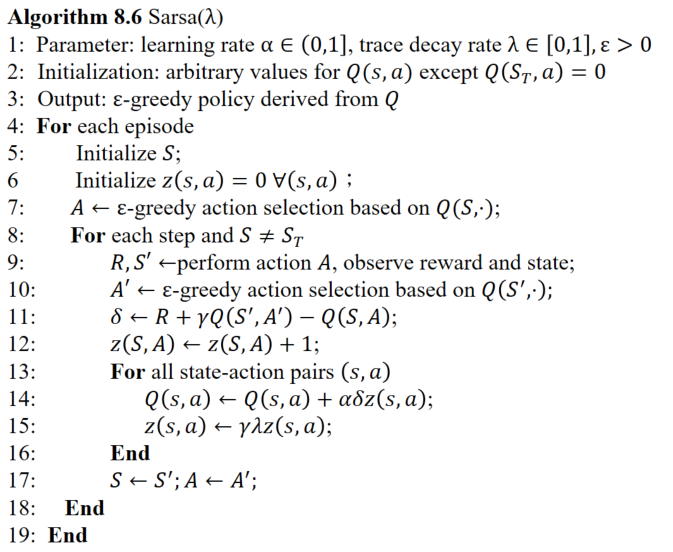

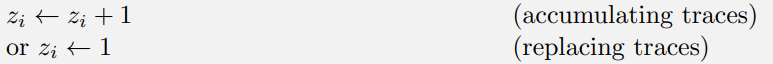